In [1]:
!pip install cpi

     |████████████████████████████████| 25.5 MB 27 kB/s 


In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [135]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [145]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False


In [146]:
df = pd.read_csv('/content/SM_10.csv')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

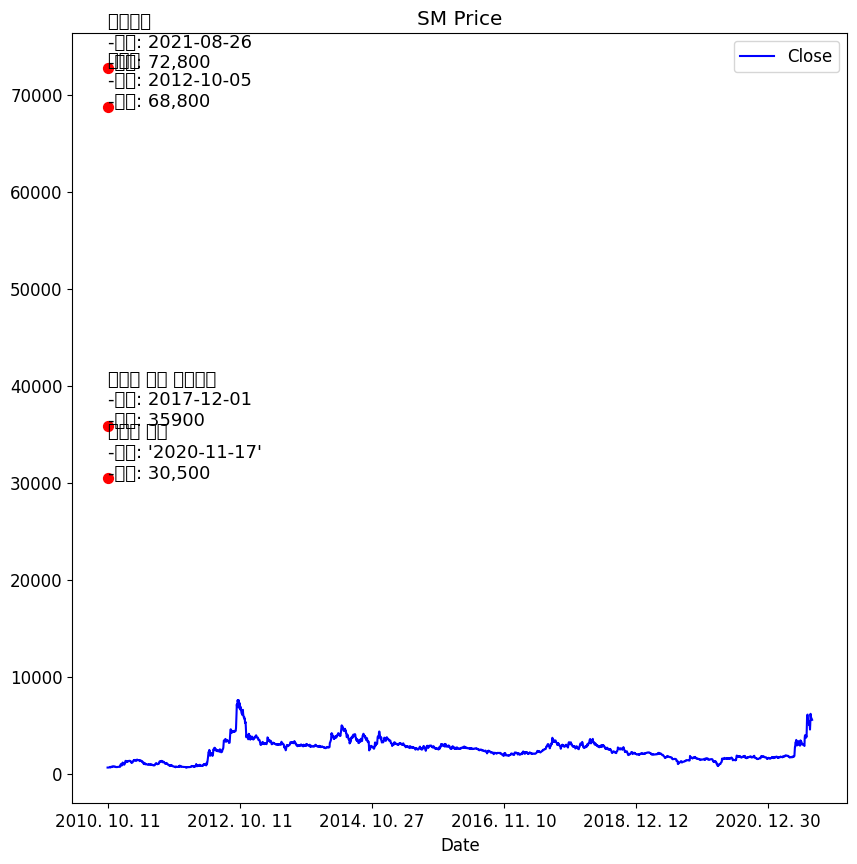

In [147]:
fig,ax = plt.subplots()
df.plot(x= 'Date', y='Close', title = 'SM Price', color = 'Blue',ax=ax)

ax.annotate('', xy=('2012-10-05' ,68800.0), xytext=('2012-10-05', 68800.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2012-10-05',68800, "최고점 \n-날짜: 2012-10-05 \n-종가: 68,800",fontsize=13)

ax.annotate('', xy=('2017-12-01',35900.0), xytext=('2017-12-01',35900.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )
plt.text('2017-12-01',35900, "엑스오 최고 활동시기 \n-날짜: 2017-12-01 \n-종가: 35900",fontsize=13)

ax.annotate('', xy=('2020-11-17' ,30500.0), xytext=('2020-11-17' ,30500.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )
plt.text('2020-11-17' ,30500, "에스파 데뷔 \n-날짜: '2020-11-17' \n-종가: 30,500",fontsize=13)

ax.annotate('', xy=('2021-08-26',72800.0), xytext=('2021-08-26',72800.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2021-08-26',72800, "신최고점 \n-날짜: 2021-08-26 \n-종가: 72,800",fontsize=13)
y1 = ['2012-10-05','2017-12-01','2020-11-17','2021-08-26']
y2 = [68800,35900,30500,72800]
plt.scatter(y1,y2,s=50,color = 'r')
fig.savefig("Chart.png")
plt.show()

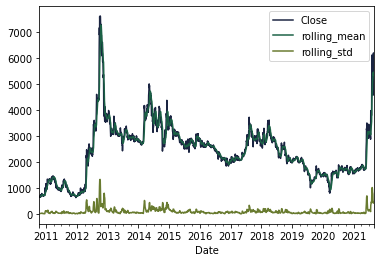

In [31]:
df.index = pd.DatetimeIndex(df.Date).to_period('D')
df.plot()

In [51]:
sm = df.resample('M').last().Close

In [52]:
indices = sm.index.year < 2019
train = sm[indices]
test = sm[~indices]
test_len = len(test)

Holt 평활화 모델

In [69]:
hs_1 = Holt(train).fit()
hs_forecast = hs_1.forecast(test_len)
hs_2 = Holt(train, exponential = True).fit()
hs_forecast2 = hs_2.forecast(test_len)
hs_3 = Holt(train, exponential = False, damped = True).fit(damping_slope = 0.99)
hs_forecast3 = hs_3.forecast(test_len)

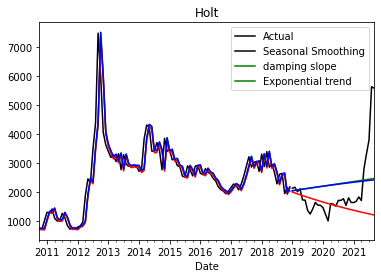

In [73]:
sm[~indices].plot(color = 'Black', title = 'Holt', label = 'Actual', legend = True)
sm[indices].plot(color = 'Black')
hs_forecast.plot(color= "Green",legend = True, label = 'Seasonal Smoothing')
hs_1.fittedvalues.plot(color = "Green")

hs_forecast2.plot(color= "Red",legend = True, label = 'damping slope')
hs_2.fittedvalues.plot(color = "Red")

hs_forecast3.plot(color= "Blue",legend = True, label = 'Exponential trend')
hs_3.fittedvalues.plot(color = "Blue")

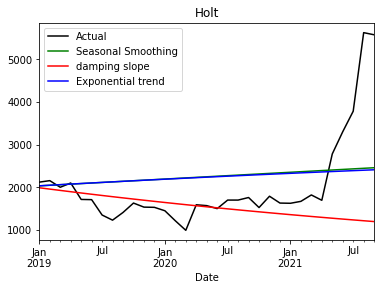

In [74]:
sm[~indices].plot(color = 'Black', title = 'Holt', label = 'Actual', legend = True)

hs_forecast.plot(color= "Green",legend = True, label = 'Seasonal Smoothing')
hs_forecast2.plot(color= "Red",legend = True, label = 'damping slope')
hs_forecast3.plot(color= "Blue",legend = True, label = 'Exponential trend')


In [64]:
hw_1 = ExponentialSmoothing(train,trend = 'mul', seasonal = 'add', seasonal_periods=12).fit()
hw_forecast_1 = hw_1.forecast(test_len)

hw_2 = ExponentialSmoothing(train,trend = 'add', seasonal = 'mul', seasonal_periods=12).fit()
hw_forecast_2 = hw_2.forecast(test_len)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


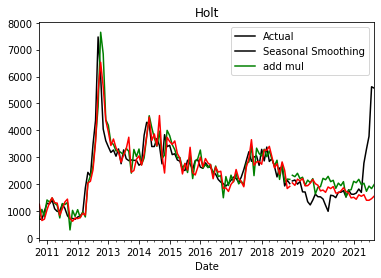

In [72]:
sm[~indices].plot(color = 'Black', title = 'Holt', label = 'Actual', legend = True)
sm[indices].plot(color = 'Black')
hw_forecast_1.plot(color= 'Green',legend = True, label = 'Seasonal Smoothing')
hw_1.fittedvalues.plot(color = 'Green')

hw_forecast_2.plot(color= 'Red',legend = True, label = 'add mul')
hw_2.fittedvalues.plot(color = 'Red')

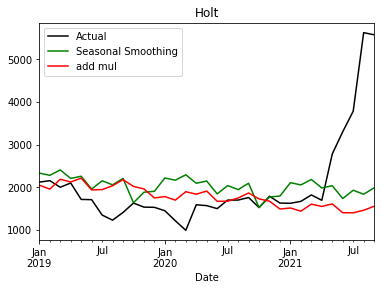

In [68]:
sm[~indices].plot(color = 'Black', title = 'Holt', label = 'Actual', legend = True)
hw_forecast_1.plot(color= 'Green',legend = True, label = 'Seasonal Smoothing')
hw_forecast_2.plot(color= 'Red',legend = True, label = 'add mul')


여기서 부터는 Prophet

In [75]:
!pip install fbprophet

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [77]:
df = pd.read_csv('/content/SM_10.csv')

In [78]:
df.head()

,Date,Close
0,2010. 10. 11,650
1,2010. 10. 12,651
2,2010. 10. 13,653
3,2010. 10. 14,652
4,2010. 10. 15,654


In [79]:
df.rename(columns = {'Date':'ds','Close':'y'},inplace = True)
df.ds = pd.to_datetime(df.ds)
df.count()

ds    2667
y     2667
dtype: int64

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


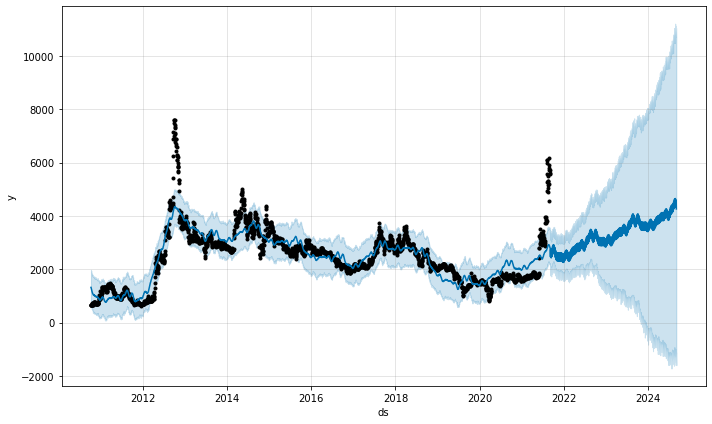

In [80]:
model = Prophet(seasonality_mode='additive')
model.fit(df)
future = model.make_future_dataframe(periods = 365*3)
forecast = model.predict(future)
model.plot(forecast)
plt.tight_layout()

NameError: ignored

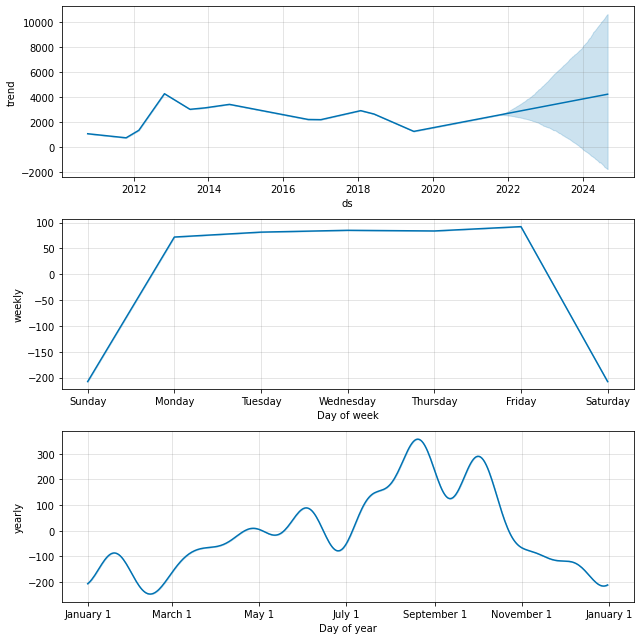

In [81]:
model.plot_components(forecast)
plt.tight_layout()

In [90]:
from fbprophet.plot import add_changepoints_to_plot

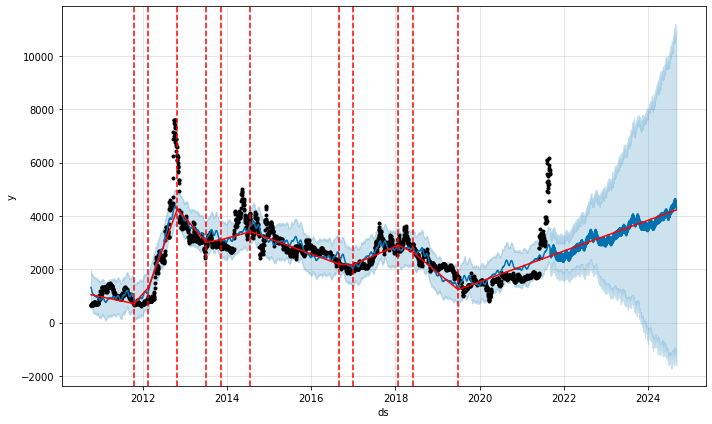

In [91]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()


In [92]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-10-11,1049.171135,590.963959,1983.131875,1049.171135,1049.171135,274.160104,274.160104,274.160104,72.115351,72.115351,72.115351,202.044752,202.044752,202.044752,0.0,0.0,0.0,1323.331239
1,2010-10-12,1048.284941,662.686629,1938.424561,1048.284941,1048.284941,266.425287,266.425287,266.425287,81.618714,81.618714,81.618714,184.806573,184.806573,184.806573,0.0,0.0,0.0,1314.710228
2,2010-10-13,1047.398747,699.255436,1954.588107,1047.398747,1047.398747,252.034736,252.034736,252.034736,85.149703,85.149703,85.149703,166.885032,166.885032,166.885032,0.0,0.0,0.0,1299.433483
3,2010-10-14,1046.512554,657.470629,1937.963291,1046.512554,1046.512554,232.405743,232.405743,232.405743,83.871748,83.871748,83.871748,148.533995,148.533995,148.533995,0.0,0.0,0.0,1278.918296
4,2010-10-15,1045.626360,589.695648,1913.052506,1045.626360,1045.626360,222.245048,222.245048,222.245048,92.241261,92.241261,92.241261,130.003787,130.003787,130.003787,0.0,0.0,0.0,1267.871408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,2024-08-27,4217.660926,-1308.642545,10888.747830,-1763.902654,10629.741692,387.689676,387.689676,387.689676,81.618714,81.618714,81.618714,306.070963,306.070963,306.070963,0.0,0.0,0.0,4605.350603
3758,2024-08-28,4219.239917,-1241.705673,10940.889645,-1770.083062,10636.293025,377.304040,377.304040,377.304040,85.149703,85.149703,85.149703,292.154337,292.154337,292.154337,0.0,0.0,0.0,4596.543957
3759,2024-08-29,4220.818908,-1105.927289,11053.064302,-1776.263470,10642.844359,361.086661,361.086661,361.086661,83.871748,83.871748,83.871748,277.214913,277.214913,277.214913,0.0,0.0,0.0,4581.905569
3760,2024-08-30,4222.397899,-1351.896162,10971.834400,-1782.443879,10649.395692,353.783830,353.783830,353.783830,92.241261,92.241261,92.241261,261.542569,261.542569,261.542569,0.0,0.0,0.0,4576.181729


In [111]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          3762 non-null   datetime64[ns]
 1   trend                       3762 non-null   float64       
 2   yhat_lower                  3762 non-null   float64       
 3   yhat_upper                  3762 non-null   float64       
 4   trend_lower                 3762 non-null   float64       
 5   trend_upper                 3762 non-null   float64       
 6   additive_terms              3762 non-null   float64       
 7   additive_terms_lower        3762 non-null   float64       
 8   additive_terms_upper        3762 non-null   float64       
 9   weekly                      3762 non-null   float64       
 10  weekly_lower                3762 non-null   float64       
 11  weekly_upper                3762 non-null   float64     

In [118]:
yearly = forecast.yearly
trend = forecast.trend
Date = forecast.ds
N_Date = ['2012.01.01','2013.01.01','2014.01.01','2015.01.01','2016.01.01','2017.01.01','2018.01.01','2019.01.01','2020.01.01','2021.01.01']
income = [1099,	1685	,2870,	3222,	3499,	3653,	6122,	6578,	5799,	3407]

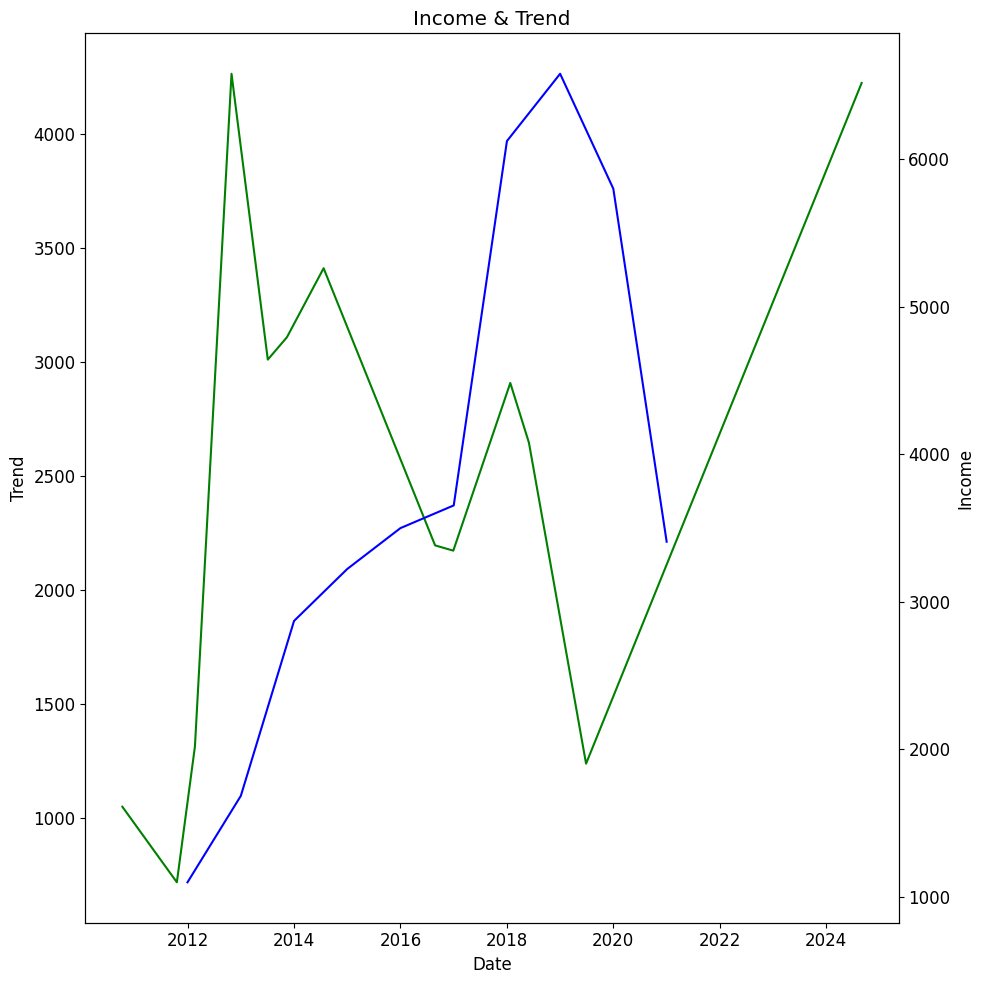

In [133]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()
ax1.plot(Date,trend,color= 'green')

ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(N_Date),income,color = 'blue')


ax1.set(xlabel='Date', ylabel='Trend',
       title='Income & Trend')
ax2.set(ylabel = 'Income')


fig.savefig("test1.png")

plt.show()